In [39]:
import numpy as np
import matplotlib.pyplot as plt
from potentials import d_poly__d_x

In [40]:
def const_pot(x):
    return d_poly__d_x(x, t=0)

In [70]:
dt = 0.01
time_horizon = 10
num_steps = int(time_horizon/dt)
t = np.linspace(0, time_horizon, num_steps)

x = np.empty(shape=t.shape[0])
x[0] = 0

x_one = x.copy()
x_one[0] = 1

x_neg = x.copy()
x_neg[0] = -1

Q = 10

for i in range(len(x) - 1):
    x[i+1] = x[i] + dt*(-const_pot(x[i]) - Q*np.sin((2*np.pi*t[i])/(time_horizon)))
    x_one[i+1] = x_one[i] + dt*(-const_pot(x_one[i]) - Q*np.sin((2*np.pi*t[i])/(time_horizon)))
    x_neg[i+1] = x_neg[i] + dt*(-const_pot(x_neg[i]) - Q*np.sin((2*np.pi*t[i])/(time_horizon)))

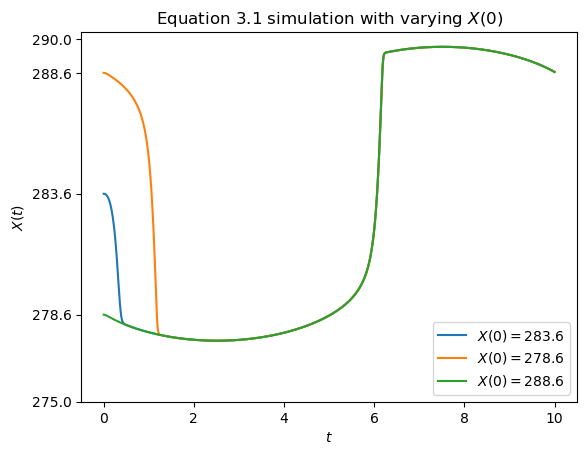

In [71]:
x_scaled = (x*5) + 283.6
plt.plot(t, x_scaled, label=r'$X(0) = 283.6$')
plt.plot(t, (x_one * 5) + 283.6, label=r'$X(0) = 278.6$')
plt.plot(t, (x_neg * 5) + 283.6, label=r'$X(0) = 288.6$')
plt.yticks([275, 278.6, 283.6, 288.6, 290])
plt.xlabel(r'$t$')
plt.ylabel(r'$X(t)$')
plt.title('Equation 3.1 simulation with varying $X(0)$')
plt.legend()
plt.savefig('eq3non_noise.svg', transparent=True)
plt.show()